# Binormal distributions

### Exercise

Plot the $1\sigma$ level surfaces of the binormal distributions with parameters $\mu_{1} = 1.3$, $\mu_{2} = 0.5$, $\sigma_{1} = 1.7$, and $\sigma_{ 2} = 2.3$ for three different correlations $\rho = −0.9,\, 0$ and $0.5$.

---

### Solution

Let $X_{1} \sim N(\mu_1, \sigma_1)$ and $X_{2} \sim N(\mu_2, \sigma_2)$ both normal distributions. The joint probability density function is given by:

$$f(x_1, x_2) = \frac{1}{2\pi \sigma_1 \sigma_2 \sqrt{1 - \rho^2}}\exp{\left(-\frac{1}{2\left(1 - \rho^2 \right)} \left[\left(\frac{x_1 - \mu_1}{\sigma_1} \right)^2 + \left(\frac{x_2 - \mu_2}{\sigma_2} \right)^2 - \frac{2\rho \left(x_1 - \mu_1 \right)\left(x_2 - \mu_2 \right)}{\sigma_1 \sigma_2} \right]\right)}$$

where $\rho$ is the correlation between the random variables $X_1$ and $X_2$.

Using matrix notation:

$$
\vec{x} = \begin{bmatrix}
x_1\\ 
x_2
\end{bmatrix},\qquad 
\vec{\mu} = \begin{bmatrix}
\mu_1\\ 
\mu_2
\end{bmatrix}
$$

$$
\mathbb{A} = \frac{1}{1-\rho^2} \begin{bmatrix}
{\large \frac{1}{\sigma_1^2}} & {\large -\frac{\rho}{\sigma_1 \sigma_2}}\\ 
{\large -\frac{\rho}{\sigma_1 \sigma_2}} & {\large \frac{1}{\sigma_2^2}}
\end{bmatrix}
$$

where $\mathbb{A}$ is the Hessian matrix, its determinant is:

$$ ||\mathbb{A}|| = \frac{1}{\sigma_1^2 \sigma_2^2 \left(1 - \rho^2 \right)}$$

Therefore, the joint PDF of $X_1$ and $X_2$ is:

$$f(\vec{x}) = \frac{|| \mathbb{A} ||^{1/2}}{2\pi} \exp{\left[-\frac{1}{2} \left(\vec{x} - \vec{\mu} \right)^{\rm T} \mathbb{A} \left(\vec{x} - \vec{\mu} \right) \right]} $$.

The Hessian matrix is symmetric, its inverse is the covariance matrix:

$$\mathbb{V} = \mathbb{A}^{-1} =
\begin{bmatrix}
\sigma_1^2 & \sigma_1 \sigma_2 \rho\\ 
\sigma_1 \sigma_2 \rho & \sigma_2^2
\end{bmatrix} =
\begin{bmatrix}
{\rm Cov}\left(x_1,x_1\right) & {\rm Cov}\left(x_1,x_2\right)\\ 
{\rm Cov}\left(x_2,x_1\right) & {\rm Cov}\left(x_2,x_2\right)
\end{bmatrix}
$$

Then, the joint PDF of $X_1$ and $X_2$ can also be expressed as:

$$f(\vec{x}) = \frac{1}{2\pi ||\mathbb{V}||^{1/2}} \exp{\left[-\frac{1}{2} \left(\vec{x} - \vec{\mu} \right)^{\rm T} \mathbb{V}^{-1} \left(\vec{x} - \vec{\mu} \right) \right]} $$.

In [1]:
%matplotlib inline

In [2]:
# Getting libraries

import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import linalg as la
from matplotlib.patches import Ellipse
from matplotlib.patches import Arrow

In [3]:
# Parameters of the binormal distribution

mu1 = 1.3
mu2 = 0.5
sigma1 = 1.7
sigma2 = 2.3

In [4]:
# Parameters of the 2D random variable

mu = np.array([mu1, mu2])
sigma = np.array([sigma1, sigma2])

Let be the vector:

$$\vec{v} = \vec{x} - \vec{\mu}$$

We can define the quadratic form:

$$q(\vec{v}) = \vec{v}^{\rm T}\mathbb{A} \vec{v}$$

Since $\mathbb{A}$ is a symmetric matrix, then it is diagonalizable with orthogonal eigenvectors:

$$\mathbb{A} \vec{e}_1 = \lambda_1 \vec{e}_1$$
$$\mathbb{A} \vec{e}_2 = \lambda_2 \vec{e}_2$$

We can define the matrix:

$$\mathbb{C} = \left[\vec{e}_1\;\: \vec{e}_2 \right]$$

where $\mathbb{C}$ is the basis change matrix from the canonical basis to the basis of eigenvectors $\vec{e}_1$ and $\vec{e}_2$. The matrix $\mathbb{A}$ can be written in terms of the matrix $\mathbb{C}$:

$$\mathbb{A} = \mathbb{C}^{\rm T}\mathbb{\Lambda} \mathbb{C}$$

where $\mathbb{\Lambda}$ is the diagonal matrix whose elements are the eigenvalues of matrix $\mathbb{A}$:

$$\mathbb{\Lambda} = 
\begin{bmatrix}
\lambda_1 & 0\\ 
0 & \lambda_2
\end{bmatrix}
$$

The coordinates of the vector $\vec{v}$ in the basis $\left(\vec{e}_1, \vec{e}_2\right)$ are:

$$\vec{w} = \mathbb{C} \vec{v}\qquad 
\vec{w} = \begin{bmatrix}
w_1\\ 
w_2
\end{bmatrix}$$

From the quadratic form $q(\vec{v})$ we obtain:

$$q(\vec{v}) = \vec{w}^{\rm T}\mathbb{\Lambda} \vec{w}$$

$$q(\vec{v}) = \lambda_1 w_1^2 + \lambda_2 w_2^2$$

A base change in 2D in general is a rotation of coordinate axes:

$$\mathbb{C} = 
\begin{bmatrix}
\vec{e}_{1,x} & \vec{e}_{2,x}\\ 
\vec{e}_{1,y} & \vec{e}_{2,y}
\end{bmatrix} =
\begin{bmatrix}
\cos{\theta} & -\sin{\theta}\\ 
\sin{\theta} & \cos{\theta}
\end{bmatrix}
$$

where $\theta$ is the angle of inclination with respect to the X axis of the canonical basis.

In [5]:
class binormalDistribution:
    
    
    def __init__(self,mu1, mu2, sigma1, sigma2, rho):
        
        self.mu = np.array([mu1, mu2])
        self.sigma = np.array([sigma1, sigma2])        
        self.rho = rho          
        
        return
    
    
    def covarianceMatrix(self):
        
        cova11 = self.sigma[0]**2
        cova22 = self.sigma[1]**2
        cova12 = self.rho*self.sigma[0]*self.sigma[1]
        self.cova = np.array([[cova11, cova12],
                              [cova12, cova22]])
        return 
    
    
    def eigens(self):
        
        binormalDistribution.covarianceMatrix(self)        
        hesse = la.inv(self.cova)
        eigenvalues, eigenvectors = la.eigh(hesse)
        self.eigenvalue1, self.eigenvalue2 = eigenvalues[0], eigenvalues[1]
        self.eigenvector1, self.eigenvector2 = eigenvectors[:,0], eigenvectors[:,1]
    
        return 
    
    
    def ellipseParameters(self):
        
        binormalDistribution.eigens(self)
        self.axis1 = 2/np.sqrt(self.eigenvalue1)
        self.axis2 = 2/np.sqrt(self.eigenvalue2)
        eigenvector1_x, eigenvector1_y = self.eigenvector1[0], self.eigenvector1[1]    
        self.inclination = np.arctan2(eigenvector1_y, eigenvector1_x)    
        
        return 
    
    
    def ellipseGraph(self):
        
        binormalDistribution.ellipseParameters(self)
        sns.set_context('paper', font_scale=1.5)
        fig, ax = plt.subplots(figsize=(7, 7))
        ax.set_xlabel('$X_1$')
        ax.set_ylabel('$X_2$')        
        ellipse_1sigma = Ellipse(self.mu, width=self.axis1, height=self.axis2, angle=math.degrees(self.inclination), 
                                 fc='none', ec='tab:blue', label=r'$1\sigma$')
        ax.add_patch(ellipse_1sigma)
        arrow1 = Arrow(self.mu[0], self.mu[1], self.eigenvector1[0]/np.sqrt(self.eigenvalue1), 
                       self.eigenvector1[1]/np.sqrt(self.eigenvalue1), width=0.1, color='tab:green', label='axis 1')
        ax.add_patch(arrow1)
        arrow2 = Arrow(self.mu[0], self.mu[1], self.eigenvector2[0]/np.sqrt(self.eigenvalue2), 
                       self.eigenvector2[1]/np.sqrt(self.eigenvalue2), width=0.1, color='tab:orange', label='axis 2')
        ax.add_patch(arrow2)
        plt.axis('scaled')
        plt.legend()
        plt.show()
        
        return

- $\rho = -0.9$

In [6]:
dist = binormalDistribution(mu1, mu2, sigma1, sigma2, rho=-0.9)

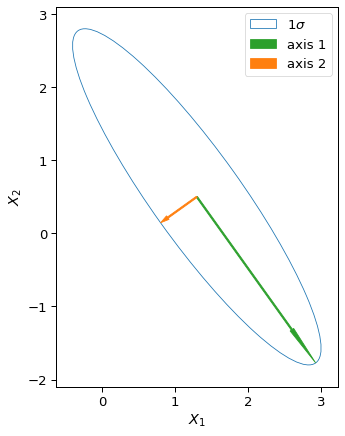

In [7]:
dist.ellipseGraph()

- $\rho = 0$

In [8]:
dist.rho = 0

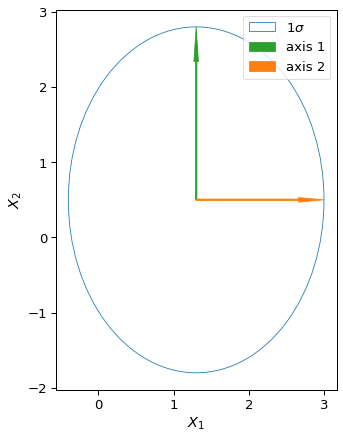

In [9]:
dist.ellipseGraph()

- $\rho = 0.5$

In [10]:
dist.rho = 0.5

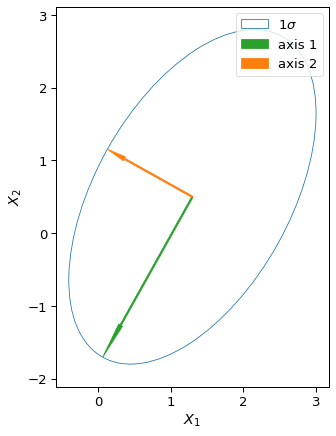

In [11]:
dist.ellipseGraph()